In [1]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import pandas as pd
import math

from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [8]:
X = iris.data
y = iris.target

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
manova = MANOVA(endog=X, exog=y)
print(manova.mv_test())
#res = manova.mv_test()

                   Multivariate linear model
                                                                
----------------------------------------------------------------
           x0            Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0280 4.0000 146.0000 1266.9972 0.0000
         Pillai's trace  0.9720 4.0000 146.0000 1266.9972 0.0000
 Hotelling-Lawley trace 34.7123 4.0000 146.0000 1266.9972 0.0000
    Roy's greatest root 34.7123 4.0000 146.0000 1266.9972 0.0000



In [55]:
kmeans = KMeans(n_clusters=3).fit(X)
labels = kmeans.labels_
manova = MANOVA(endog=X, exog=labels)
print(manova.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
           x0           Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.4034 4.0000 146.0000 53.9845 0.0000
         Pillai's trace 0.5966 4.0000 146.0000 53.9845 0.0000
 Hotelling-Lawley trace 1.4790 4.0000 146.0000 53.9845 0.0000
    Roy's greatest root 1.4790 4.0000 146.0000 53.9845 0.0000



In [40]:
rand_labels = []
for i in X:
    rand_labels.append(np.random.random_integers(0,2))
rand_labels = np.array(rand_labels)    
    
manova = MANOVA(endog=X, exog=rand_labels)
print(manova.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
           x0           Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.3881 4.0000 146.0000 57.5462 0.0000
         Pillai's trace 0.6119 4.0000 146.0000 57.5462 0.0000
 Hotelling-Lawley trace 1.5766 4.0000 146.0000 57.5462 0.0000
    Roy's greatest root 1.5766 4.0000 146.0000 57.5462 0.0000



<ipython-input-40-059f229ba7c6>:3: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
  rand_labels.append(np.random.random_integers(0,2))


In [49]:
kmeans = KMeans(n_clusters=3).fit(X)
labels = kmeans.labels_
manova = MANOVA(endog=X, exog=labels)
print(manova.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
           x0            Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda  0.0443 4.0000 146.0000 786.5264 0.0000
         Pillai's trace  0.9557 4.0000 146.0000 786.5264 0.0000
 Hotelling-Lawley trace 21.5487 4.0000 146.0000 786.5264 0.0000
    Roy's greatest root 21.5487 4.0000 146.0000 786.5264 0.0000



In [48]:
n_clusters = [2,3,4,5,6,7,8,9,10]
kmeans_initial_center_list = []
for k in n_clusters:
    np.random.seed(321)
    idx = np.random.randint(X.shape[0], size=k)
    initial_centers = []
    for i in idx:
        initial_centers.append(X[i])
    initial_centers = np.array(initial_centers)
    #np.savetxt("initial_centers.csv", initial_centers, delimiter=",")
    kmeans_initial_center_list.append(initial_centers)

In [51]:
for initial_centers in kmeans_initial_center_list:
    print("Using k =", initial_centers.shape[0])
    kmeans = KMeans(n_clusters=initial_centers.shape[0], init=initial_centers).fit(X)
    labels = kmeans.labels_
    manova = MANOVA(endog=X, exog=labels)
    print(manova.mv_test())

Using k = 2
                   Multivariate linear model
                                                               
---------------------------------------------------------------
           x0            Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda  0.0460 4.0000 146.0000 756.4199 0.0000
         Pillai's trace  0.9540 4.0000 146.0000 756.4199 0.0000
 Hotelling-Lawley trace 20.7238 4.0000 146.0000 756.4199 0.0000
    Roy's greatest root 20.7238 4.0000 146.0000 756.4199 0.0000

Using k = 3
                  Multivariate linear model
                                                              
--------------------------------------------------------------
           x0           Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1813 4.0000 146.0000 164.7958 0.0000
         Pillai's trace 0.8187 4.0000 146.0000 164.7958 0.0

/home/taufique/Codes/onweshon/consensus_clustering/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/home/taufique/Codes/onweshon/consensus_clustering/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/home/taufique/Codes/onweshon/consensus_clustering/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/home/taufique/Codes/onweshon/consensus_clustering/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._

                  Multivariate linear model
                                                              
--------------------------------------------------------------
           x0           Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.1202 4.0000 146.0000 267.0549 0.0000
         Pillai's trace 0.8798 4.0000 146.0000 267.0549 0.0000
 Hotelling-Lawley trace 7.3166 4.0000 146.0000 267.0549 0.0000
    Roy's greatest root 7.3166 4.0000 146.0000 267.0549 0.0000

Using k = 10
                  Multivariate linear model
                                                              
--------------------------------------------------------------
           x0           Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.2058 4.0000 146.0000 140.8627 0.0000
         Pillai's trace 0.7942 4.0000 146.0000 140.8627 0.0000
 Hotelling-Lawle

/home/taufique/Codes/onweshon/consensus_clustering/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


# Visualizing on simple synthetic handmade data

In [59]:
data = [[1,1],
        [1,2],
        [2,1],
        [2,2],
        [2,3], 
        [3,2], 
        [3,3], 
        [3,7], 
        [3,8], 
        [3,9], 
        [4,7], 
        [4,8], 
        [4,9], 
        [6,3], 
        [6,4], 
        [7,3], 
        [7,4], 
        [8,3], 
        [8,4]]


In [60]:
X = np.array(data)
y = np.array(labels)

In [61]:
X

array([[1, 1],
       [1, 2],
       [2, 1],
       [2, 2],
       [2, 3],
       [3, 2],
       [3, 3],
       [3, 7],
       [3, 8],
       [3, 9],
       [4, 7],
       [4, 8],
       [4, 9],
       [6, 3],
       [6, 4],
       [7, 3],
       [7, 4],
       [8, 3],
       [8, 4]])

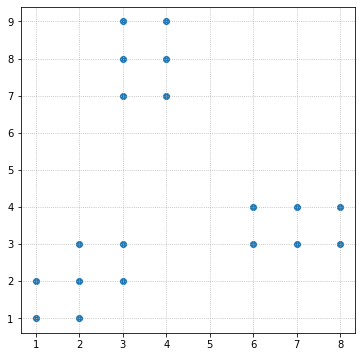

In [67]:
fig = plt.figure(figsize=(6, 6))
gs = GridSpec(nrows=1, ncols=1)

# Create subplots in each of the grid cells
ax = fig.add_subplot(gs[0,0])

ax.scatter(X[:,0], X[:,1])
ax.grid(axis="both",linestyle='dotted')

In [69]:
# Labels following ground truth clustering structure
labels = [0,0,0,0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2]
manova = MANOVA(endog=X, exog=labels)
print(manova.mv_test())

                 Multivariate linear model
                                                            
------------------------------------------------------------
           x0           Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.0925 2.0000 17.0000 83.3507 0.0000
         Pillai's trace 0.9075 2.0000 17.0000 83.3507 0.0000
 Hotelling-Lawley trace 9.8060 2.0000 17.0000 83.3507 0.0000
    Roy's greatest root 9.8060 2.0000 17.0000 83.3507 0.0000



In [70]:
# Labels following random clustering structure
labels = [0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0,1,2,0]
manova = MANOVA(endog=X, exog=labels)
print(manova.mv_test())

                 Multivariate linear model
                                                            
------------------------------------------------------------
           x0           Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.5040 2.0000 17.0000  8.3640 0.0030
         Pillai's trace 0.4960 2.0000 17.0000  8.3640 0.0030
 Hotelling-Lawley trace 0.9840 2.0000 17.0000  8.3640 0.0030
    Roy's greatest root 0.9840 2.0000 17.0000  8.3640 0.0030

